# Classifying movie reviews

Classify movie reviews as positive or negative, based on the text content of the reviews.

Using IMDB dataset in Keras. Preprocessed, reviews have been turned into a sequence of integers, where each interger stands for a specific word in a dictionary.


## 1. Loading the IMDB dataset

Keep the top 10000 most frequently occurring words.
label 0 stands for negative; 1 for positive

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]
train_labels[0]

1

Since only load 10000 most frequent words, on word index will exceed 10000:

In [4]:
max([max(sequence) for sequence in train_data])

9999

Decode the reviews back to English words:

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

Indices are offset by 3 because 0,1,2 are reserved indices for "padding", "start of sequence" and "unknown"

In [6]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 2. Preparing the data

Encoding the integer sequences into a binary matrix:

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorize the labels:

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3. Building the network

Two intermediate layers with 16 hidden units and third layer that outputs the scalar prediction

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 4. Compiling the model

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Or alternatively:

In [12]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

## 5. Setting a validation set

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 6. Training the model

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 120ms/step - loss: 0.5103 - acc: 0.7984 - val_loss: 0.4061 - val_acc: 0.8487
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3087 - acc: 0.9020 - val_loss: 0.3053 - val_acc: 0.8881
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2269 - acc: 0.9272 - val_loss: 0.2931 - val_acc: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1789 - acc: 0.9410 - val_loss: 0.2931 - val_acc: 0.8810
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1455 - acc: 0.9527 - val_loss: 0.2915 - val_acc: 0.8826
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1172 - acc: 0.9644 - val_loss: 0.2997 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1000 - acc: 0.9684 - val_loss: 0.3128 - val_acc: 0.8827
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0810 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## 7. Plotting the training and validation loss/accuracy

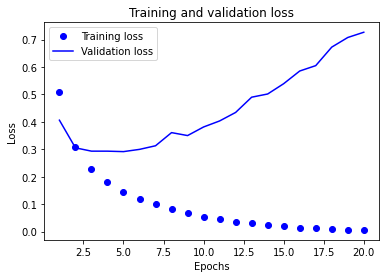

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
acc_val = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

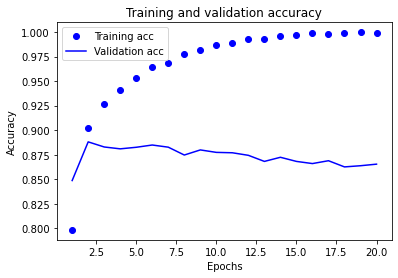

In [17]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Overfitting!

Stop training after 3 epochs.

## 8. Retraining a model from scratch

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.4389 - accuracy: 0.8283
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2527 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1981 - accuracy: 0.9291
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3257 - accuracy: 0.8730


In [19]:
results

[0.32570508122444153, 0.8730000257492065]

Predict classification on new data:

In [20]:
model.predict(x_test)

array([[0.11859892],
       [0.99969196],
       [0.5133117 ],
       ...,
       [0.06651396],
       [0.0455352 ],
       [0.5819979 ]], dtype=float32)